In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [98]:
path = r"/Users/BradenStoeger/Desktop/korea_data.xlsx"
econ_df = pd.read_excel(path)
econ_df = econ_df.replace("..", 'nan')

econ_df.index = econ_df["Year"]
econ_df = econ_df.drop("Year", axis = 1)

econ_df = econ_df.astype(float)
econ_df = econ_df.loc["1969":"2016"]

column_names = {"GDP growth (annual %)": 'gdp_growth', 
               'Gross capital formation (% of GDP)': 'gross_capital',
               'Population growth (annual %)': 'pop_growth',
               'Birth rate, crude (per 1,000 people)': 'birth_rate',
               'Broad money growth (annual %)': 'broad_money',
               'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)': 'final_consum',
               'General government final consumption expenditure (annual % growth)': 'gen_govt_consum',
               'Gross capital formation (annual % growth)': 'gross_capital',
               'Households and NPISHs Final consumption expenditure (annual % growth)': 'household',
               'Unemployment, total (% of total labor force) (national estimate)': 'unemployed'}
econ_df = econ_df.rename(columns = column_names)

display('-'*100)
display(econ_df.isnull().any())
econ_df.head()

'----------------------------------------------------------------------------------------------------'

gdp_growth         False
gross_capital      False
pop_growth         False
birth_rate         False
broad_money        False
final_consum       False
gen_govt_consum    False
gross_capital      False
household          False
unemployed         False
dtype: bool

,gdp_growth,gross_capital,pop_growth,birth_rate,broad_money,final_consum,gen_govt_consum,gross_capital,household,unemployed
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


,gdp_growth,gross_capital,pop_growth,birth_rate,broad_money,final_consum,gen_govt_consum,gross_capital,household,unemployed
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gen_govt_consum,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_capital,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
household,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployed,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<AxesSubplot:>

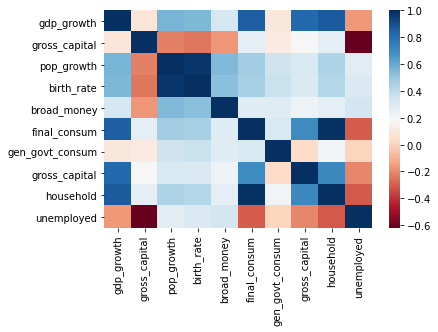

In [99]:
corr = econ_df.corr()

display(corr)

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

In [100]:
econ_df_before = econ_df
econ_df_after = econ_df.drop (['gdp_growth', "birth_rate", "final_consum", 'gross_capital'], axis = 1)


X1 = sm.tools.add_constant(econ_df_before)
X2 = sm.tools.add_constant(econ_df_after)


series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index = X2.columns)


print("Data Before")
print('-'*100)
display(series_before)

print("Data After")
print('-'*100)
display(series_after)

Data Before
----------------------------------------------------------------------------------------------------


const               314.550195
gdp_growth            9.807879
gross_capital         2.430057
pop_growth           25.759263
birth_rate           26.174368
broad_money           1.633079
final_consum       2305.724583
gen_govt_consum      32.527332
gross_capital         3.796420
household          2129.093634
unemployed            2.800008
dtype: float64

Data After
----------------------------------------------------------------------------------------------------


const              27.889334
pop_growth          1.970769
broad_money         1.587748
gen_govt_consum     1.183152
household           1.702965
unemployed          1.587179
dtype: float64

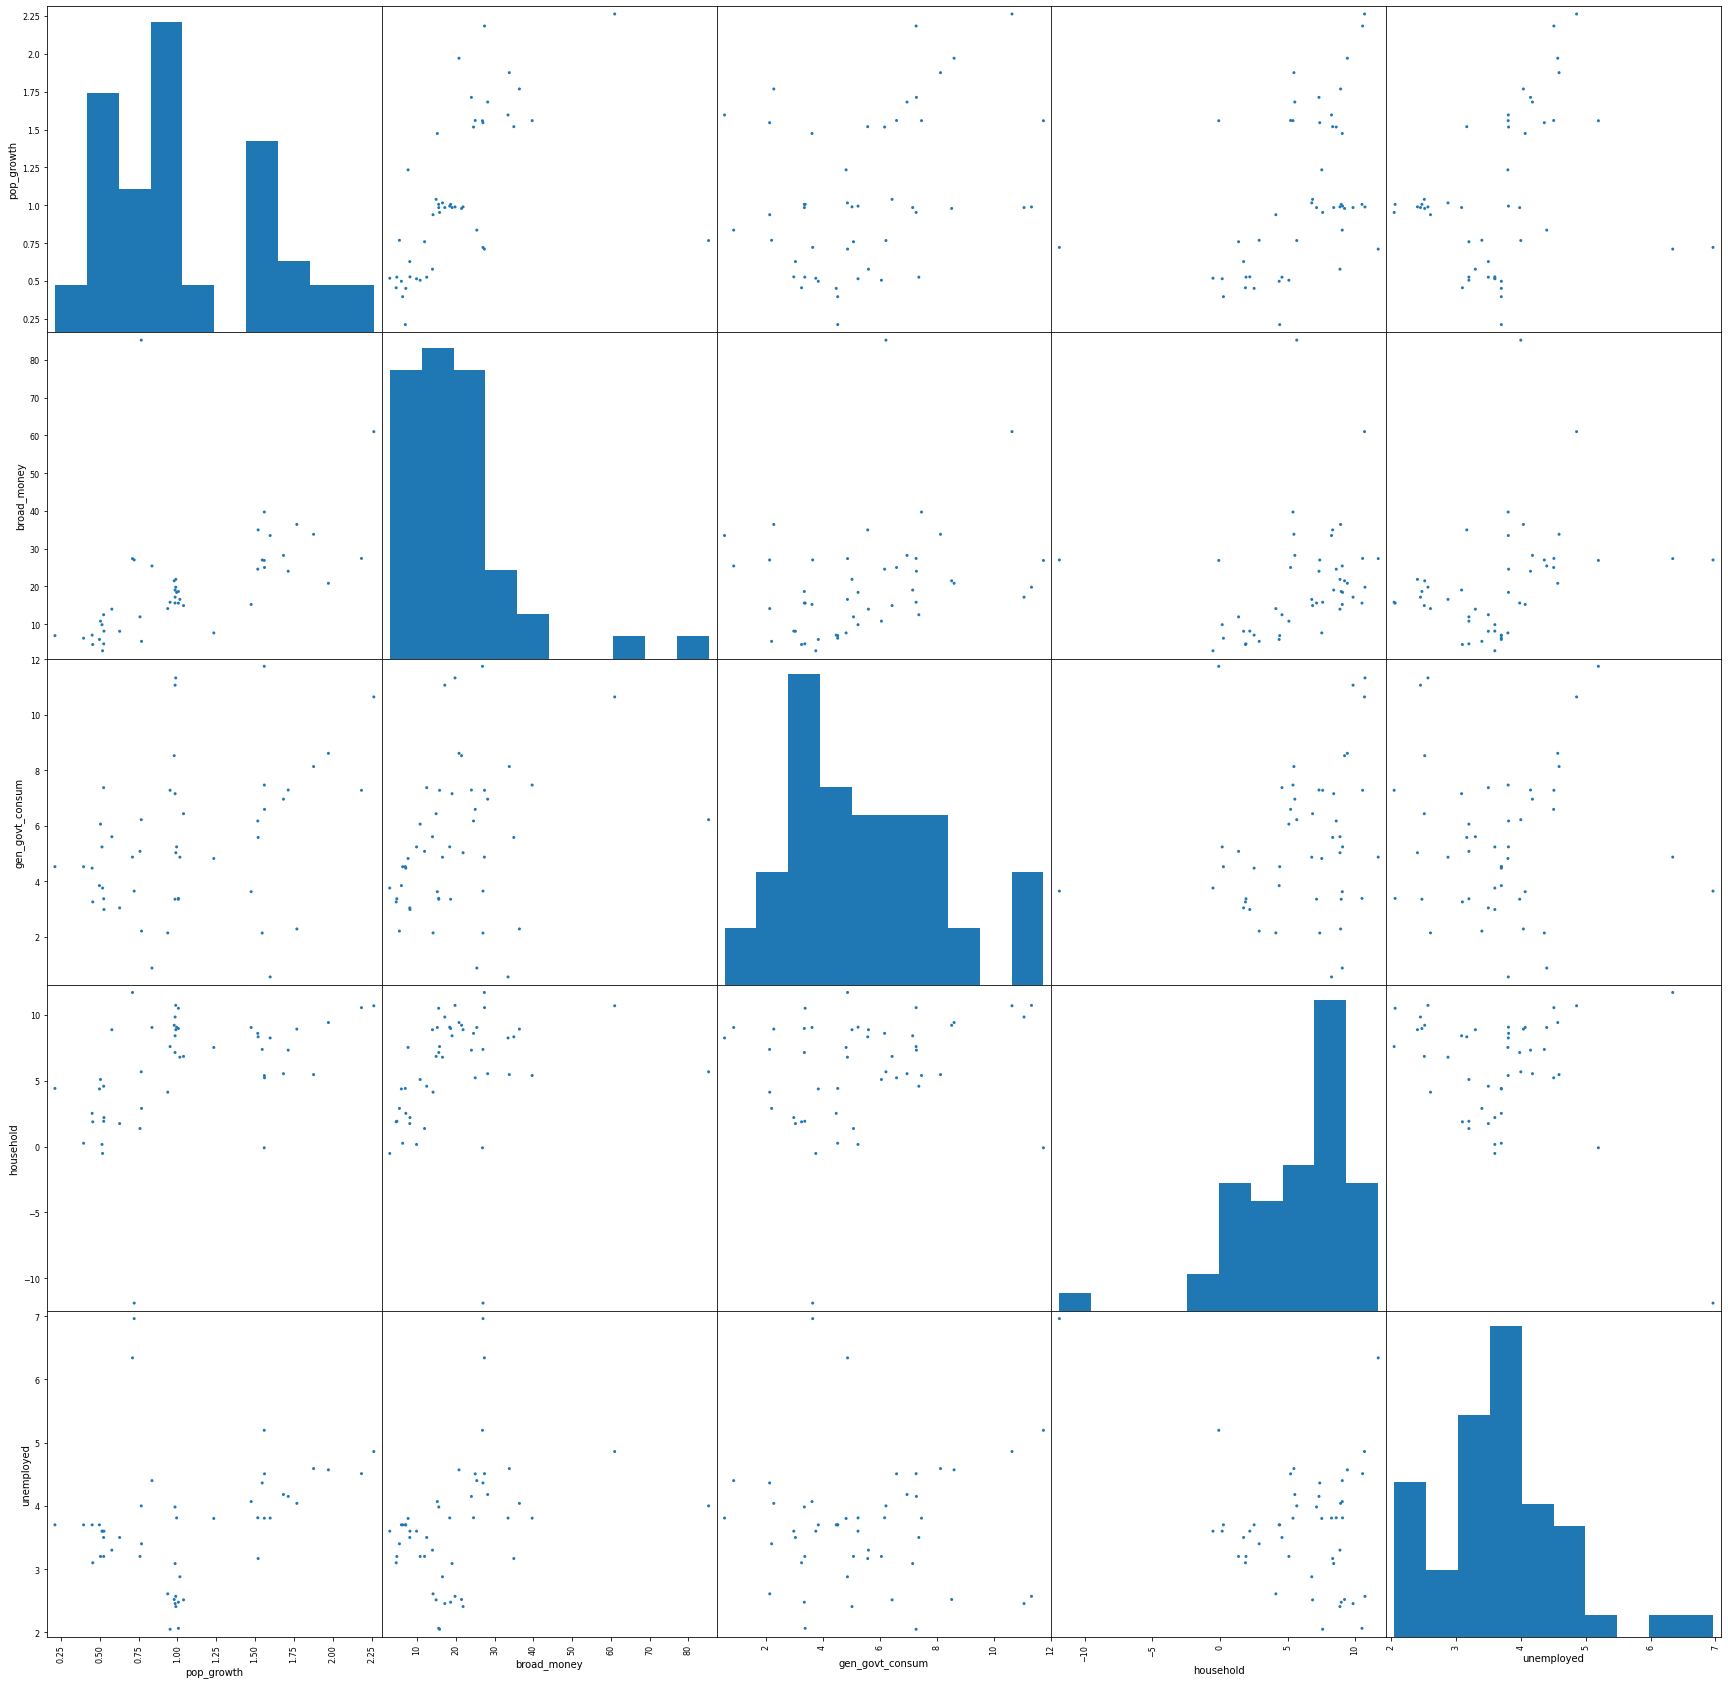

In [101]:
pd.plotting.scatter_matrix(econ_df_after, alpha = 1, figsize = (30, 30))

plt.show()

In [102]:
desc_df = econ_df.describe()
desc_df

desc_df.loc["+3_std"] = desc_df.loc["mean"] + (desc_df.loc["std"] * 3)
desc_df.loc["-3_std"] = desc_df.loc["mean"] - (desc_df.loc["std"] * 3)

desc_df

,gdp_growth,gross_capital,pop_growth,birth_rate,broad_money,final_consum,gen_govt_consum,gross_capital,household,unemployed
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [103]:
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis = 1)]

econ_df.index.difference(econ_remove_df.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

In [106]:
# define our input variable (X) & output variable
econ_df_after = econ_df.drop(['birth_rate', 'final_consum','gross_capital'], axis = 1)

X = econ_df_after.drop("gdp_growth", axis=1)
Y = econ_df_after[["gdp_growth"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

regression_model = LinearRegression()

regression_model.fit(X_train, Y_train)

LinearRegression()

In [107]:
intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for cf in zip(X.columns, regression_model.coef_[0]):
    print("The coefficient for {} is {:.2}".format(cf[0], cf[1]))

The intercept for our model is 2.338
----------------------------------------------------------------------------------------------------
The coefficient for pop_growth is 2.1
The coefficient for broad_money is 0.0079
The coefficient for gen_govt_consum is -0.31
The coefficient for household is 0.81
The coefficient for unemployed is -0.077


In [108]:
y_predict = regression_model.predict(X_test)

y_predict[:5]

array([[ 8.85029644],
       [ 7.99908502],
       [ 5.48488073],
       [ 4.72212226],
       [11.26101721]])

In [109]:
X2 = sm.add_constant(X)

model = sm.OLS(Y, X2)

est = model.fit()

In [110]:
# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heteroscedasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heteroscedasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heteroscedasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heteroscedasticity.")

0.39380940273210063 0.44115342478371267
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.3938
We fail to reject the null hypthoesis, so there is no heteroscedasticity. 

0.2271604128358321 0.23919499858419868
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.2272
We fail to reject the null hypthoesis, so there is no heteroscedasticity.


The number of lags will be 9
----------------------------------------------------------------------------------------------------
(array([1.68866887, 2.12947247, 3.37986208, 3.61860964, 5.66890798,
       6.63396028, 8.47485512, 9.21426081, 9.43173926]), array([0.19377653, 0.34481879, 0.3366811 , 0.46007408, 0.33977968,
       0.35602777, 0.29258733, 0.32454499, 0.39841189]))
The lowest p-value found was 0.1938
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


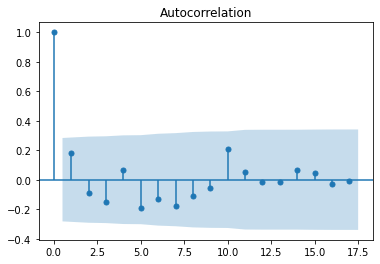

In [111]:
lag = min(10, (len(X)//5))

print('The number of lags will be {}'.format(lag))
print('-'*100)


test_results = diag.acorr_ljungbox(est.resid, lags = lag)


print(test_results)
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)
    
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

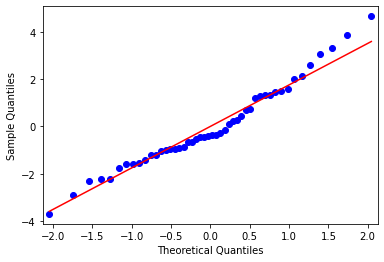

5.8194190207435286e-15

In [112]:
sm.qqplot(est.resid, line = 's')
pylab.show()

mean_residuals = sum(est.resid)/ len(est.resid)
mean_residuals

In [113]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))


MSE 1.8
MAE 1.15
RMSE 1.34


In [114]:
model_r2 = r2_score(y_test, y_predict)
model_r2

0.6548931332836776

In [115]:
est.conf_int()

,0,1
const,-0.985490,4.778670
pop_growth,0.725690,3.738077
broad_money,-0.037678,0.056561
gen_govt_consum,-0.511816,-0.054271
household,0.600834,0.941309
unemployed,-0.763555,0.671108


In [116]:
est.pvalues

const              1.913421e-01
pop_growth         4.644802e-03
broad_money        6.879955e-01
gen_govt_consum    1.653842e-02
household          1.528547e-11
unemployed         8.971543e-01
dtype: float64

In [117]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     39.05
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           9.69e-15
Time:                        21:15:04   Log-Likelihood:                -95.041
No. Observations:                  48   AIC:                             202.1
Df Residuals:                      42   BIC:                             213.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8966      1.428     

In [118]:
econ_df_after = econ_df.drop(['birth_rate', 'final_consum','gross_capital','broad_money',
                              'unemployed'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [119]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     67.86
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.53e-16
Time:                        21:15:06   Log-Likelihood:                -95.134
No. Observations:                  48   AIC:                             198.3
Df Residuals:                      44   BIC:                             205.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7518      0.730     

In [123]:
import pickle

with open('my_multilinear_regression.sav','wb') as f:
    pickle.dump(regression_model, f)
with open('my_multilinear_regression.sav', 'rb') as pickle_file:
    regression_model_2 = pickle.load(pickle_file)

regression_model_2.predict([X_test.loc[2002]])

array([[8.88514353]])